In [23]:
import librosa
import wave
import numpy as np
import matplotlib.pyplot as plt

def load_wav_file(filename):
    wav = wave.open(filename, "r")
    frames = wav.readframes(-1)
    sound_info = np.frombuffer(frames, "int16")
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

x, fr = load_wav_file('data/audio/dumxartuej.wav')

x2, fr2 = librosa.load('data/audio/dumxartuej.wav', sr=20000)

[ 0  0 -1 ...  7 -6 12]


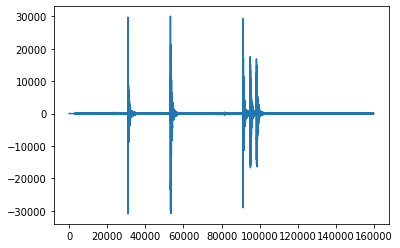

In [15]:
print(x)

plt.plot(x)

[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.9672852e-04
  1.3122559e-03  6.4086914e-04]
0.9826355


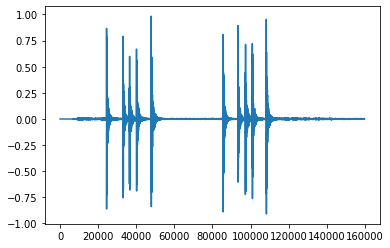

In [16]:
print(x2)
plt.plot(x2)

maxAbs2 = np.max(np.abs(x2))

print(maxAbs2)

32199
[ 0.00000000e+00  0.00000000e+00 -3.10559006e-05 ...  4.03726708e-04
  1.33540373e-03  6.52173913e-04]


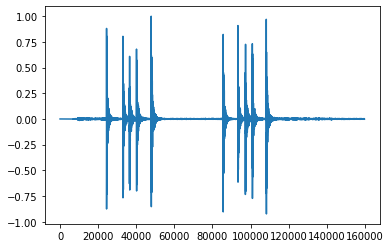

In [25]:
maxAbs = np.max(np.abs(x))
print(maxAbs)

x = x / (maxAbs + 1)
print(x)

plt.plot(x)

In [20]:
def get_features(x, plot = False):
    poly_features=librosa.feature.poly_features(y = x) #order 1 by default
    features = poly_features[1]

    # plot the features
    if(plot):
        plt.figure(figsize=(15, 5))
        plt.plot(features)
        plt.title('Features')
        plt.show()

    # if val inn norm is > 2, set to 1, else  0
    # Everything over 2000 hertz gets set to 1
    features_array = features > 2
    features_array = features_array.astype(int)

    # find changes from 0 to 1
    features_array = np.diff(features_array)
    # find indices where changes occur
    features_array = np.where(features_array == 1)[0]

    difference_array = np.diff(features_array)
    
    # Pad to length of 15
    difference_array = np.pad(difference_array, (0, 15 - len(difference_array)), 'constant')

    return difference_array

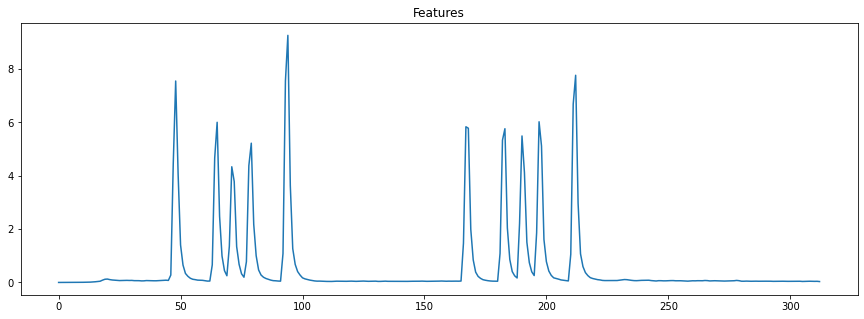

array([17,  7,  7, 15, 74, 15,  7,  8, 14,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [26]:
get_features(x, plot=True)

In [1]:
file1 = "data/knockdata.pkl"
file2 = "data/knockdata_joe.pkl"
file3 = "data/knockdata_tony.pkl"


import pandas as pd

df1 = pd.read_pickle(file1)
df2 = pd.read_pickle(file2)
df3 = pd.read_pickle(file3)


In [5]:
start_label = 200

for i in range(len(df3)):
    label = start_label + (i // 3)
    df3.iloc[i]['label'] = label

df3

,filename,label
0,radtqbspve.wav,200
0,zxogapkubr.wav,200
0,rtvbbzbfyx.wav,200
0,csbfhksvpj.wav,201
0,mjdenbdxcj.wav,201
0,jkhivvzers.wav,201
0,hescmblism.wav,202
0,ieczqropvh.wav,202
0,jgfduietfe.wav,202
0,qvevekybnq.wav,203


In [7]:
df4 = pd.concat([df1, df2, df3])

print(len(df1))
print(len(df2))
print(len(df3))
df4

31
33
54


,filename,label
0,oagvqxyqxz.wav,1
0,tkaorzfyzc.wav,1
0,uqvsgllfeq.wav,1
0,fseivkaego.wav,2
0,ieaxshpxwj.wav,2
...,...,...
0,jlzswxwpsr.wav,216
0,xnzsiyorwy.wav,216
0,ehxeagksdh.wav,217
0,aibjsgeegu.wav,217


In [8]:
# Save the dataframe
df4.to_pickle("data/knockdata_all.pkl")
df4.to_csv("data/knockdata_all.csv")